# Data Save

### Library Import

In [101]:
import os
import cv2
import h5py
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torchvision.transforms import transforms

### 데이터의 경로 입력

In [102]:
DATA_PATH = "dataset\\"

### train, test, val 폴더 경로 구분

In [103]:
file_path = dict()
for path in os.listdir(DATA_PATH):
    if "train" in path:
        file_path["train_path"] = os.path.join(DATA_PATH, path)
    elif "val" in path:
        file_path["val_path"] = os.path.join(DATA_PATH, path)
    else:
        file_path["test_path"] = os.path.join(DATA_PATH, path)

In [104]:
file_path

{'test_path': 'dataset\\test',
 'train_path': 'dataset\\train',
 'val_path': 'dataset\\val'}

### label 목록 저장

In [105]:
label_list = [label for label in os.listdir(file_path["train_path"])]
label_list

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

In [106]:
train_img = []      # 파일명 저장
train_label = []    # label 값 저장
test_img = []
test_label = []

for label in label_list:
        for img_path in os.listdir(os.path.join(file_path["train_path"], label)):
                train_img.append(img_path)
                train_label.append(img_path.split("_")[0])
        for img_path in os.listdir(os.path.join(file_path['val_path'], label)):
                train_img.append(img_path)
                train_label.append(img_path.split("_")[0])
        for img_path in os.listdir(os.path.join(file_path['test_path'], label)):
                test_img.append(img_path)
                test_label.append(img_path.split("_")[0])


In [107]:
print(train_img[4500])
print(train_label[4500])
train_label[4500]='metal'
print(train_label[4500])
print(train_img[8100])
print(train_label[8100])
train_label[8100]='trash'
print(train_label[8100])

20240626_161207.jpg
20240626
metal
20240626_162343.jpg
20240626
trash


In [108]:
train_df = pd.DataFrame({
    'file_name' : train_img,
    'label': train_label
})
test_df = pd.DataFrame({
    'file_name' : test_img,
    'label' : test_label
})
display(train_df)
display(test_df)

,file_name,label
0,battery_1.jpg,battery
1,battery_10.jpg,battery
2,battery_100.jpg,battery
3,battery_101.jpg,battery
4,battery_102.jpg,battery
...,...,...
8995,trash_767.jpg,trash
8996,trash_786.jpg,trash
8997,trash_788.jpg,trash
8998,trash_81.jpg,trash


,file_name,label
0,battery_105.jpg,battery
1,battery_110.jpg,battery
2,battery_112.jpg,battery
3,battery_117.jpg,battery
4,battery_126.jpg,battery
...,...,...
995,trash_820.jpg,trash
996,trash_822.jpg,trash
997,trash_83.jpg,trash
998,trash_91.jpg,trash


In [109]:
train_data = []
test_data = []

for file_name, folder_name in zip(train_img, train_label):
    if file_name in os.listdir(os.path.join(file_path['train_path'], folder_name)):
        img = cv2.imread(os.path.join(file_path['train_path'], folder_name, file_name), cv2.IMREAD_COLOR_RGB)
        train_data.append(img)
    else:
        img = cv2.imread(os.path.join(file_path['val_path'], folder_name, file_name), cv2.IMREAD_COLOR_RGB)
        train_data.append(img)

for file_name, folder_name in zip(test_img, test_label):
    img = cv2.imread(os.path.join(file_path['test_path'],folder_name,file_name), cv2.IMREAD_COLOR_RGB)
    test_data.append(img)



In [110]:
len(train_data), len(test_data)

(9000, 1000)

In [111]:
le = LabelEncoder()
le_fit = le.fit(train_label)
train_classes = {num: name for num, name in enumerate(le_fit.classes_)}
train_label = le_fit.transform(train_label)
test_label = le_fit.transform(test_label)

print(train_classes)
print(train_label)
print(test_label)

{0: 'battery', 1: 'biological', 2: 'cardboard', 3: 'clothes', 4: 'glass', 5: 'metal', 6: 'paper', 7: 'plastic', 8: 'shoes', 9: 'trash'}
[0 0 0 ... 9 9 9]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 

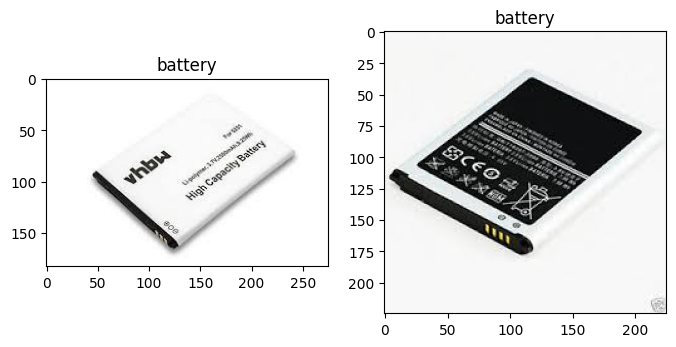

In [112]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(train_data[0])
plt.title(train_classes[train_label[0]])

plt.subplot(122)
plt.imshow(test_data[0])
plt.title(train_classes[test_label[0]])

plt.show()

In [113]:
train_df = pd.DataFrame({
    'file_name' : train_img,
    'label': train_label
})
test_df = pd.DataFrame({
    'file_name' : test_img,
    'label' : test_label
})
display(train_df)
display(test_df)

,file_name,label
0,battery_1.jpg,0
1,battery_10.jpg,0
2,battery_100.jpg,0
3,battery_101.jpg,0
4,battery_102.jpg,0
...,...,...
8995,trash_767.jpg,9
8996,trash_786.jpg,9
8997,trash_788.jpg,9
8998,trash_81.jpg,9


,file_name,label
0,battery_105.jpg,0
1,battery_110.jpg,0
2,battery_112.jpg,0
3,battery_117.jpg,0
4,battery_126.jpg,0
...,...,...
995,trash_820.jpg,9
996,trash_822.jpg,9
997,trash_83.jpg,9
998,trash_91.jpg,9


In [115]:
test_df.to_csv("data\\garbage_test_data")
train_df.to_csv("data\\garbage_train_data")
train_classes

{0: 'battery',
 1: 'biological',
 2: 'cardboard',
 3: 'clothes',
 4: 'glass',
 5: 'metal',
 6: 'paper',
 7: 'plastic',
 8: 'shoes',
 9: 'trash'}